#  <center>  Advanced Mechanics of Solids Term Project-Spring Semester(2022) <center>

### <center> Term Project Report on <center>

## <center> Buckling of Simply Supported Rectangular Plate Under Shearing Action<center>

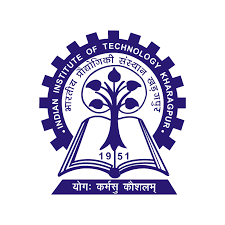

### <center>Group No - 3 <center>
#### <center> Prepared by <center>
#### <center> Kanhu Hansdah (21ME63R01)<center>
#### <center> Keshava G (21ME63R40)<center>
#### <center> Punith H J (21ME63R33)<center>
#### <center> R Lohit Raj (21ME63D01)<center>

## PROBLEM STATEMENT

### We have a Rectangular plate with dimensions a and b along x and y direction respectively.
### The plate is subjected to In-plane Shearing force.
### Rectangular plate is Simply supported at all edges, i.e at $x=0,x=a,y=0,y=b$, deflection(w)=0.
### We have to find critical buckling shear stress and plot '$K_c$' vs 'Aspect ratio'. 


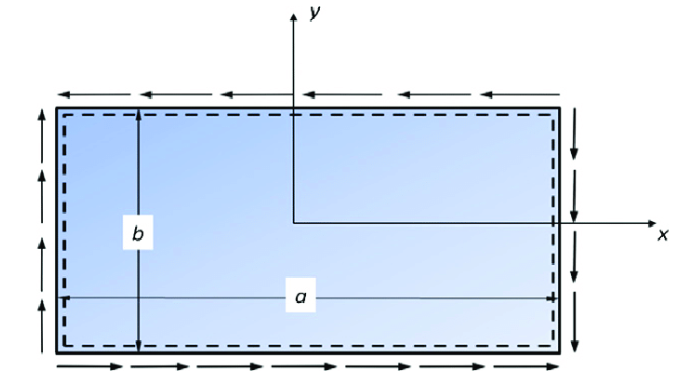

## Useful representations

$(1)D = \frac{Eh^3}{12(1-\nu^2)}$\
$(2) M_x = -D (\frac{\partial^2 w}{\partial x^2} + \nu \frac{\partial^2 w}{\partial y^2})$\
$(3) M_y = -D (\frac{\partial^2 w}{\partial y^2} + \nu \frac{\partial^2 w}{\partial x^2})$\
$(4) M_{xy} = -D (\frac{\partial^2 w}{\partial x \partial y} )$\
$(5) Q_x  =  \frac{\partial M_x}{\partial x} + \frac{\partial M_{xy}}{\partial y} $\
$(6) Q_y  =  \frac{\partial M_{xy}}{\partial x} + \frac{\partial M_y}{\partial y} $\
$(7) N_x = \frac{\partial F ^2}{\partial y^2}$\
$(8) N_y = \frac{\partial F ^2}{\partial x^2}$\
$(9) N_{xy} = -\frac{\partial F ^2}{\partial y \partial x}$
 


## Prerequisites-

#### The Föppl–von Kármán equation is
\begin{align*}
D\nabla^4 w -N_x \frac{\partial^2 w}{\partial x^2}- N_{xy} \frac{\partial^2 w}{\partial x \partial y}-N_y \frac{\partial^2 w}{\partial y^2} = q 
 \end{align*}
 $where$ \
  \begin{align*}
 \nabla^4 w = \frac{\partial^4 w}{\partial x^4}+\frac{\partial^4 w}{\partial^2 x \partial^2 y} + \frac{\partial^4 w}{\partial y^4} \
 \end{align*}

#### For our case Plates is under the action of shearing load therefore $N_x$ and $N_y$ are zero, $N_x=0$ , $N_y=0$ and $q=0$ as no normal load in acting.
#### Final Governing Differential equation become:
\begin{align*}
D\nabla^4 w - N_{xy} \frac{\partial^2 w}{\partial x \partial y}=0
 \end{align*}


#### So we got our final Governing differential equation as mentioned above.
#### We have to select appropriate w such that it should satisfy all Boundary condition ,
####  $w=0$  at  $x=0,x=a,y=0,y=b$ 
Let,\
\begin{align*}
w= \sum_{m=1}^{M}\sum_{n=1}^{N}A_{mn}*\sin(m.\pi.x/a)*sin(n.pi.y/b)
\end{align*}

#### To find the constants of w i.e $A_{mn}$, we need m*n equation.
#### So we use method of Weighted Residuals.

i.e \
\
$\int_{0}^{a} \int_{0}^{b} Residue*weight.function$  $dy dx = 0$ \
\
Here, we take weight function equal to displacement function [$w$]

In [1]:
import sympy as sym
from sympy import symbols, Eq, solve
from sympy import *
from IPython.display import Math,Latex
import tableprint as tp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x, y = sym.symbols('x, y')
E,mu,h,D,a,b,L,m,n,S,p,q,Nxy= sym.symbols('E,mu,h,D,a,b,L,m,n,S,p,q,Nxy')
m,n,M,N = sym.symbols('m, n,M,N')
w=sym.Function('w')(x,y)
a, b, Amn,i,j,R,lamda,Mij,Aij= sym.symbols('a, b, Amn,i,j,R,lamda,Mij,Aij')

In [3]:
def biharmonic(f):
    return sym.diff(f,x,4)+2*sym.diff(f,x,2,y,2)+sym.diff(f,y,4)

In [4]:
bi=biharmonic(w)

In [5]:
de_2=-S*sym.diff(w,x,y)
de_2

-S*Derivative(w(x, y), x, y)

In [6]:
GDE=de_2+D*biharmonic(w)
display(Math(r'GDE= {}'.format(sym.latex(GDE))))

<IPython.core.display.Math object>

In [7]:
w1=Sum(Sum(Amn*sym.sin(m*pi*x/a)*sym.sin(n*pi*y/b),(m,1,M)),(n,1,N))
display(Math(r'w= {}'.format(sym.latex(w1))))

<IPython.core.display.Math object>

In [8]:
Residue=GDE.subs(w,w1).simplify().simplify()
display(Math(r'Residue= {}'.format(sym.latex(Residue))))

<IPython.core.display.Math object>

In [9]:
weight_fun=sin(i*pi*x/a)*sin(j*pi*y/b)
display(Math(r'weight.fun= {}'.format(sym.latex(weight_fun))))

<IPython.core.display.Math object>

In [10]:
f_eq=Residue*weight_fun
display(Math(r'final eq= {}'.format(sym.latex(f_eq))))

<IPython.core.display.Math object>

In [11]:
integration=sym.integrate(sym.integrate(f_eq,(x,0,a)),(y,0,b)).simplify()
display(Math(r'I= {}'.format(sym.latex(integration))))

<IPython.core.display.Math object>

#### Since it is difficult to solve the further equation in generalized form or substitute the value of M or N  in generalized form,
#### We will take $M =2$ and $N=2$ and solve in similar way as above.
#### The number of equations obtained is $M*N$ i.e here 4 equation, if we increase the value of M or N the number of equation increases and computation time also increses. 


In [12]:
a_11,a_12,a_21,a_22 = sym.symbols('a_11,a_12,a_21,a_22')

In [13]:
def Amn(i,j):
    T = Matrix([[a_11,a_12],[a_21,a_22]])
    return T[i-1,j-1]

In [14]:
a= R*b  # Let R be ratio of a and b
M = 2
N = 2
w2 = 0 

In [15]:
for i in range(1,M+1):
    for j in range(1,N+1):
        w1 = (sym.sin(i*sym.pi*x/a)*sym.sin(j*sym.pi*y/b))*Amn(i,j)
        w2 = w2 + w1

In [16]:
w = w2
display(Math(r'w= {}'.format(sym.latex(w))))

<IPython.core.display.Math object>

In [17]:
bi=biharmonic(w)

In [18]:
de_2=-S*sym.diff(w,x,y)

In [19]:
GDE=de_2+D*biharmonic(w)
display(Math(r'GDE= {}'.format(sym.latex(GDE))))

<IPython.core.display.Math object>

In [20]:
Residue=GDE.simplify()
display(Math(r'Residue= {}'.format(sym.latex(Residue))))

<IPython.core.display.Math object>

#### $weight function =\sin( \frac{xi\pi}{a})sin( \frac{j\pi y}{b})$   
 where i varies from 0 to M and j varies from 0 to N


#### Here i,j varies from 0 to 2.
#### For every i,j combination, we get an equation to solve for constants.

In [21]:
f_eq=Residue*sin(1*pi*x/a)*sin(1*pi*y/b)
f_eq1=sym.integrate(f_eq,(x,0,a)).simplify()
f_eq2 = sym.integrate(f_eq1,(y,0,b)).simplify()

In [22]:
f_eq3 = Residue*sin(1*pi*x/a)*sin(2*pi*y/b)
f_eq4=sym.integrate(f_eq3,(x,0,a)).simplify()
f_eq5 = sym.integrate(f_eq4,(y,0,b)).simplify()

In [23]:
f_eq6 = Residue*sin(2*pi*x/a)*sin(1*pi*y/b)
f_eq7=sym.integrate(f_eq6,(x,0,a)).simplify()
f_eq8 = sym.integrate(f_eq7,(y,0,b)).simplify()

In [24]:
f_eq9 = Residue*sin(2*pi*x/a)*sin(2*pi*y/b)
f_eq10=sym.integrate(f_eq9,(x,0,a)).simplify()
f_eq11 = sym.integrate(f_eq10,(y,0,b)).simplify()

In [25]:
eq1 = sym.Eq(f_eq2,0)
eq2 = sym.Eq(f_eq5,0)
eq3 = sym.Eq(f_eq8,0)
eq4 = sym.Eq(f_eq11,0)

In [26]:
 LHS,RHS = sym.linear_eq_to_matrix([eq1,eq2,eq3,eq4], [a_11,a_12,a_21,a_22]) #converting equation to matrix form
display(Math(r'LHS= {}'.format(sym.latex(LHS))))

<IPython.core.display.Math object>

In [27]:
SS = LHS.det()    

#### For non-trivial solution,taking determinant of co-efficient to zero and we will find the value of Shear force per unit thickness

In [28]:
eq5 = sym.Eq(SS,0)
display(eq5)

Eq((81*pi**8*D**2*R**8 + 324*pi**8*D**2*R**6 + 486*pi**8*D**2*R**4 + 324*pi**8*D**2*R**2 + 81*pi**8*D**2 - 256*R**6*S**2*b**4)*(1296*pi**8*D**2*R**8 + 11016*pi**8*D**2*R**6 + 26001*pi**8*D**2*R**4 + 11016*pi**8*D**2*R**2 + 1296*pi**8*D**2 - 4096*R**6*S**2*b**4)/(104976*R**12*b**8), 0)

In [29]:
ans = sym.solve(eq5,S)
display(Math(r'S_1 = {}'.format(sym.latex(ans[0]))))
display(Math(r'S_2 = {}'.format(sym.latex(ans[1]))))
display(Math(r'S_3 = {}'.format(sym.latex(ans[2]))))
display(Math(r'S_4 = {}'.format(sym.latex(ans[3]))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### To find the minimum among the solution of Shear force , let us take ratio of solutions

In [30]:
ratio = (ans[3]/ans[2]).subs(R,2)  #Taking arbitrary valve of R just to find ratio 
display(Math(r'Ratio = {}'.format(sym.latex(ratio))))

<IPython.core.display.Math object>

Since the ratio is greater than 1 , the minimum or critical Shear force $S_{cr}$ is \
\
<font size="4"> $S_{3} = S_{cr} = \frac{9\pi^4 DR^4+18\pi^4 D R^2+9\pi^4 D }{16 R^3b^2h}$ </font>

The general expression for  $(S)_{cr}$ is,\
<font size="4"> $S_{cr} = k_{c} \frac{\pi^2 D}{b^2h}$ </font>


In [31]:
Scr = ans[2]
k = Scr/(pi**2*D/b**2)
k_cr = k.simplify()
display(Math(r'K_c = {}'.format(sym.latex(k_cr))))

<IPython.core.display.Math object>

Therefore,\
<font size="4"> $S_{cr} = k_{c} \frac{\pi^2 D}{b^2h}$ </font>\
  where ,\
&emsp; <font size="4"> $k_{c} =  \frac{9 \pi^2 (R^4 + 2R^2 +1)}{16R^3}$</font>

In [32]:
K = lambdify(R,k_cr)
r = list(np.arange(0.5,10,0.5)) 
K_value = []
for i in range(len(r)):
    K_value.append(0)                            #initializing the K valves
zz = list(range(0,len(r)))
for z in zz:
    K_value[z] = K_value[z] + K(r[z]) 

In [33]:
R1 = np.array(r)
K_v = np.array(K_value)
import tableprint as tp
data = np.column_stack((R1,K_v))
headers = ['R', 'K_values']
tp.table(data, headers)

╭──────────┬──────────╮
│        R │ K_values │
├──────────┼──────────┤
│      0.5 │   69.396 │
│        1 │   22.207 │
│      1.5 │   17.375 │
│        2 │   17.349 │
│      2.5 │   18.676 │
│        3 │   20.562 │
│      3.5 │   22.733 │
│        4 │   25.069 │
│      4.5 │   27.511 │
│        5 │   30.023 │
│      5.5 │   32.586 │
│        6 │   35.186 │
│      6.5 │   37.814 │
│        7 │   40.464 │
│      7.5 │   43.131 │
│        8 │   45.812 │
│      8.5 │   48.504 │
│        9 │   51.206 │
│      9.5 │   53.916 │
╰──────────┴──────────╯


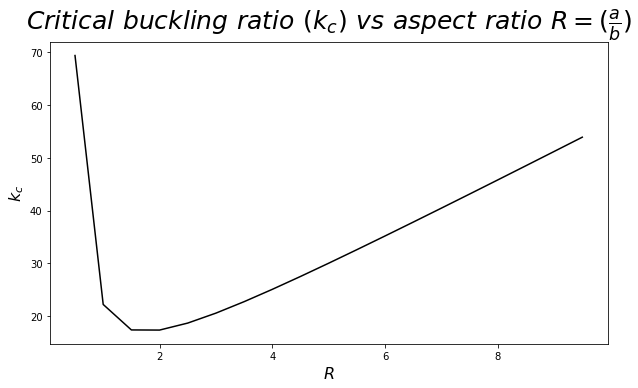

In [34]:
fig = plt.figure(figsize=(10,10/1.8))
plt.plot(r,K_value,'k-');
plt.title(r'$Critical$ $buckling$ $ratio$ $(k_{c})$ $vs$ $aspect$ $ratio$ $R=(\frac{a}{b})$',fontweight='bold',fontsize=25);
plt.xlabel(r'$R$',fontsize=16);
plt.ylabel(r'$k_{c}$',fontsize=16);

# References

### 1.Theory of Elastic Stability by Timoshenko and Gere – (Second Edition)
### 2.Solid Mechanics – A Variational Approach by Clive L. Dym and Irving H. Shames
### 3.Elastic buckling of rectangular plates under biaxial and shear loads by A. Jahanpour ∗, F. Roozbahani


## Work Distribution

#### Programming                 - Keshava G & Kanhu Hansdah
#### Research and Paper work     - Punith H J & R Lohit Raj
#### Documentation               - Keshava G  & Kanhu Hansdah
